In [161]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split

In [37]:
class Perceptron:
    
    def __init__(self, n_epoch=10):
        self.n_epoch = n_epoch
    
    def fit(self, X, y, debug=False):
        
        num_samples, num_features = X.shape
        w = np.random.rand(num_features+1)
        X_train = np.concatenate((np.ones((num_samples, 1)), X), axis=1)
        y_train = np.sign(y - 0.5)
#         print(self.n_epoch, num_samples)
#         print(w)
        
        for epoch in range(self.n_epoch):
            
            acc_before = np.sum(np.sign(X_train.dot(w)) == y_train) / num_samples
            for i in range(num_samples):
                         
                if np.sign(w.dot(X_train[i])) == y_train[i]:
                    # correctly classified
                    continue

                if y_train[i] > 0:
                    w += X_train[i]
                else:
                    w -= X_train[i]
            
            acc_after = np.sum(np.sign(X_train.dot(w)) == y_train) / num_samples
            
            if debug:
                print("> epoch :%2d, acc_before: %0.4f, acc_after: %0.4f" % (epoch, acc_before, acc_after))
        self.weights = w
        
    def predict(self, X):
        X_ = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        
        return np.sign(X_.dot(self.weights))

In [106]:
num_samples = 1000
num_features = 2

In [213]:
X, y = make_classification(n_samples=num_samples, \
                           n_features=num_features, \
                           n_informative=num_features, \
                           n_redundant=0, \
                           class_sep=2., \
                           n_clusters_per_class=1, \
                           random_state=int(time.time()))

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=int(time.time()))

In [215]:
clf = Perceptron(n_epoch=100)

In [216]:
clf.fit(X_train, y_train, debug=True)

> epoch : 0, acc_before: 0.0312, acc_after: 0.9925
> epoch : 1, acc_before: 0.9925, acc_after: 0.9938
> epoch : 2, acc_before: 0.9938, acc_after: 0.9925
> epoch : 3, acc_before: 0.9925, acc_after: 0.9925
> epoch : 4, acc_before: 0.9925, acc_after: 0.9925
> epoch : 5, acc_before: 0.9925, acc_after: 0.9925
> epoch : 6, acc_before: 0.9925, acc_after: 0.9925
> epoch : 7, acc_before: 0.9925, acc_after: 0.9912
> epoch : 8, acc_before: 0.9912, acc_after: 0.9938
> epoch : 9, acc_before: 0.9938, acc_after: 0.9938
> epoch :10, acc_before: 0.9938, acc_after: 0.9925
> epoch :11, acc_before: 0.9925, acc_after: 0.9925
> epoch :12, acc_before: 0.9925, acc_after: 0.9925
> epoch :13, acc_before: 0.9925, acc_after: 0.9925
> epoch :14, acc_before: 0.9925, acc_after: 0.9938
> epoch :15, acc_before: 0.9938, acc_after: 0.9938
> epoch :16, acc_before: 0.9938, acc_after: 0.9925
> epoch :17, acc_before: 0.9925, acc_after: 0.9938
> epoch :18, acc_before: 0.9938, acc_after: 0.9925
> epoch :19, acc_before: 0.9925

In [217]:
def get_x2_by_x1(x1, weights):
    
    return (-weights[0] - weights[1]*x1) / weights[2]

In [223]:
p1x1 = -3
p2x1 = 2
p1 = [p1x1, get_x2_by_x1(p1x1, clf.weights)]
p2 = [p2x1, get_x2_by_x1(p2x1, clf.weights)]

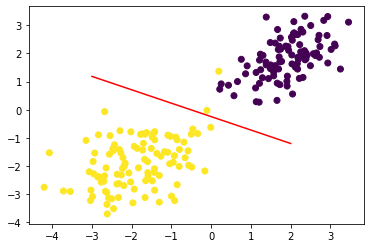

In [224]:
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color="r")